In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
train = pd.read_csv(r"C:\Users\dell\Desktop\twitter_training.csv")
validation = pd.read_csv(r"C:\Users\dell\Desktop\twitter_validation.csv")

In [42]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [43]:
validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [44]:
train.columns = ['id', 'information', 'type', 'text']
validation.columns = ['id', 'information', 'type', 'text']

In [45]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [46]:
train_df = train
val_df = validation

In [47]:
train_df["lower"] = train_df.text.str.lower()
train_df["lower"] = [str(data) for data in train_df.lower]
train_df["lower"] = train_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ',x))

In [48]:
val_df["lower"] = train_df.text.str.lower()
val_df["lower"] = [str(data) for data in val_df.lower]
val_df["lower"] = train_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ',x))

In [49]:
train_df.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


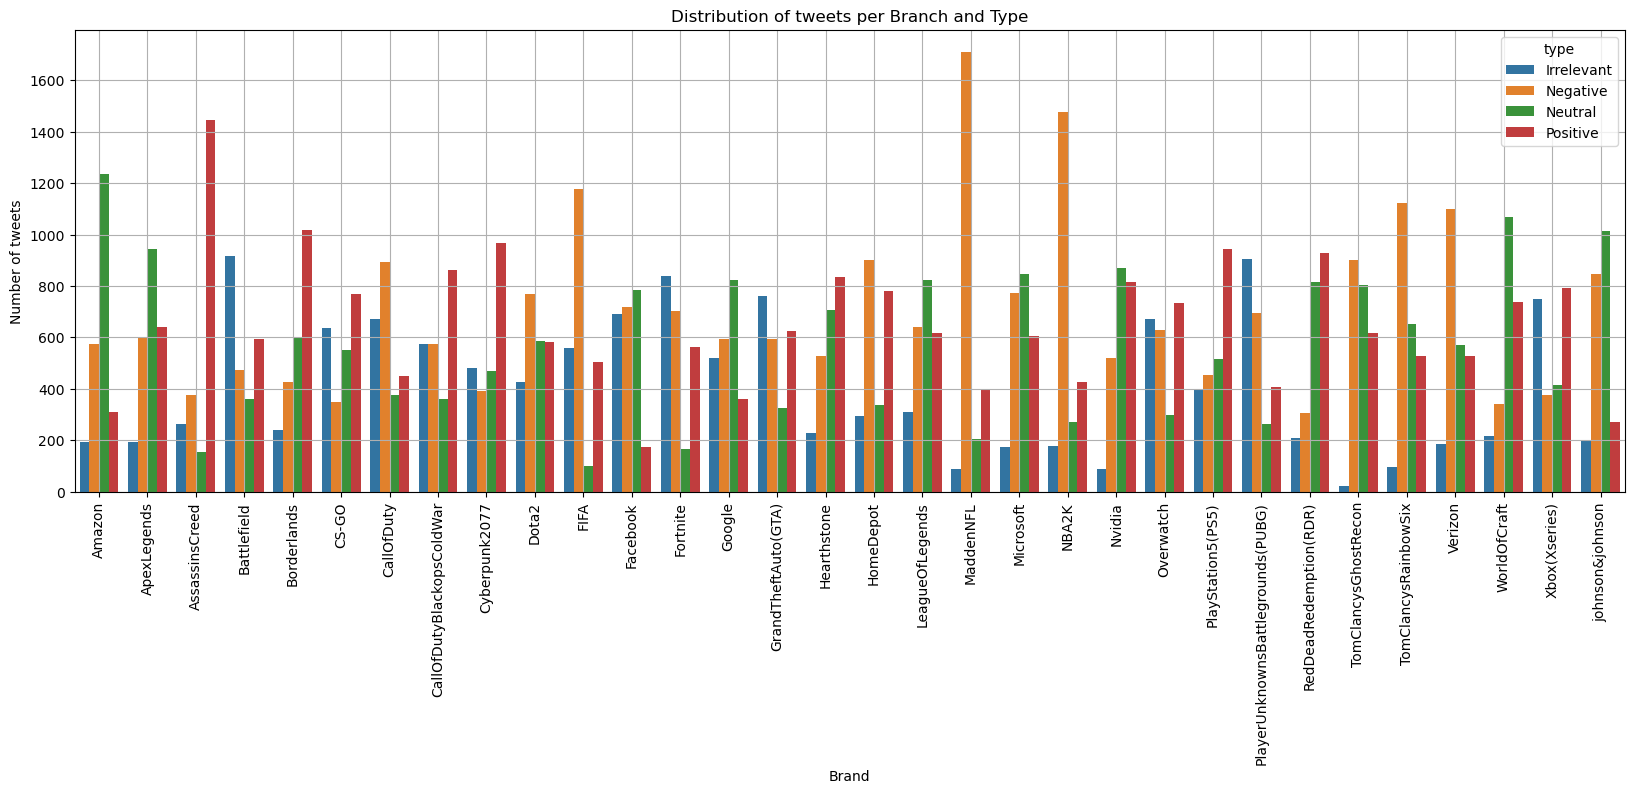

In [50]:
info_type = train.groupby(by=["information","type"]).count().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=info_type, x="information", y="id", hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [51]:
#Text Splitting
tokens_text = [word_tokenize(str(word)) for word in train_df.lower]

In [52]:
tokens_text

[['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',
  'for',
  'my',
  'pc',
  'here',
  'is',
  'the',
  'original',
  'image',
  'versus',
  'the',
  'c

In [53]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
bow_counts = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, ngram_range=(1,1))

In [55]:
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)

NameError: name 'reviews_train' is not defined

In [ ]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']


In [ ]:
y_test_bow

In [ ]:
Logistic_reg = LogisticRegression(C=1, solver="liblinear",max_iter=200)
Logistic_reg.fit(X_train_bow, y_train_bow)
test_pred = Logistic_reg.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test_bow, test_pred))

In [ ]:
x_val_bow = bow_counts.transform(val_df.lower)
y_val_bow = val_df['type']

In [ ]:
y_val_bow

In [ ]:
print(x_val_bow)


In [ ]:
Val_res = Logistic_reg.predict(x_val_bow)
print("Accuracy:", accuracy_score(y_val_bow, val_res))